<a href="https://colab.research.google.com/github/adalbertii/Seci-konwolucyjne/blob/main/cifar10_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Model klasyfikacji wieloklasowej**
- prosty model z warstami konwolucyjnymi (**631 658** parametrów podlega uczeniu, Accuracy na poziomie:  **0.70**)
- **12** sekund 1 epoka, **80** epok procesu uczenia)
-------------------------------------------------------------------


- model zoptymalizowany  (**820 474** parametrów podlega uczeniu,  Accuracy na poziomie: **0.80**)
- **25** sekund 1 epoka, **80** epok procesu uczenia)
-------------------------------------------------------------------


- model z dodaną  warstwą augmentacyjną ( **820 474** parametrów podlega uczeniu,  Accuracy na poziomie: **0.86**)
- **40** sekund 1 epoka, **80** epok procesu uczenia)

In [ ]:
import numpy as np
import tensorflow

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from tensorflow import keras

In [ ]:
from tensorflow.keras.datasets import cifar10
(x_train,y_train), (x_test,y_test) = cifar10.load_data()
x_train.shape

170498071/170498071 [==============================] - 4s 0us/step


(50000, 32, 32, 3)

**Zbior danych**

Lista klas:

0: samolot

1: samochód

2: ptak

3: kot

4: jeleń

5: pies

6: żaba

7: koń

8: statek

9: ciężarówka






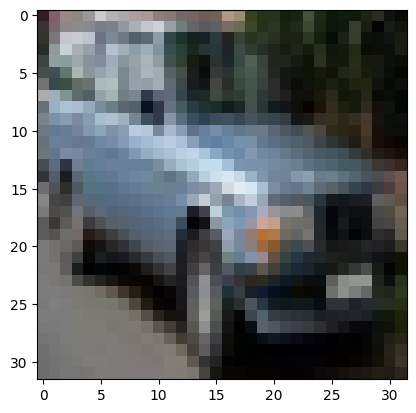

In [ ]:
# przykładowe zdjęcie
plt.imshow(x_train[201])

In [ ]:
print(y_train[201])

[1]


In [ ]:
# rozkład wartości pikseli
print(x_train.min(), "-", x_train.max())

0 - 255


In [ ]:
# skalowanie wartości pikseli (wokół 0)
x_train = (x_train / 255.0) - 0.5
x_test = (x_test / 255.0) - 0.5
print(x_train.min(), "-", x_train.max())

-0.5 - 0.5


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Convolution2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

In [ ]:
model = Sequential([
   Convolution2D(filters=64, kernel_size=(3,3), input_shape=(32,32,3), activation='relu', padding='same'),
   Convolution2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
   MaxPool2D((2,2)),

   Convolution2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'),
   Convolution2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'),
   MaxPool2D((2,2)),

   Convolution2D(filters=16, kernel_size=(3,3), activation='relu', padding='same'),
   Convolution2D(filters=16, kernel_size=(3,3), activation='relu', padding='same'),

   Flatten(),

   Dense(units=512, activation="relu"),
   Dense(units=64, activation="relu"),
   Dense(units=10, activation="softmax")
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        18464     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                   

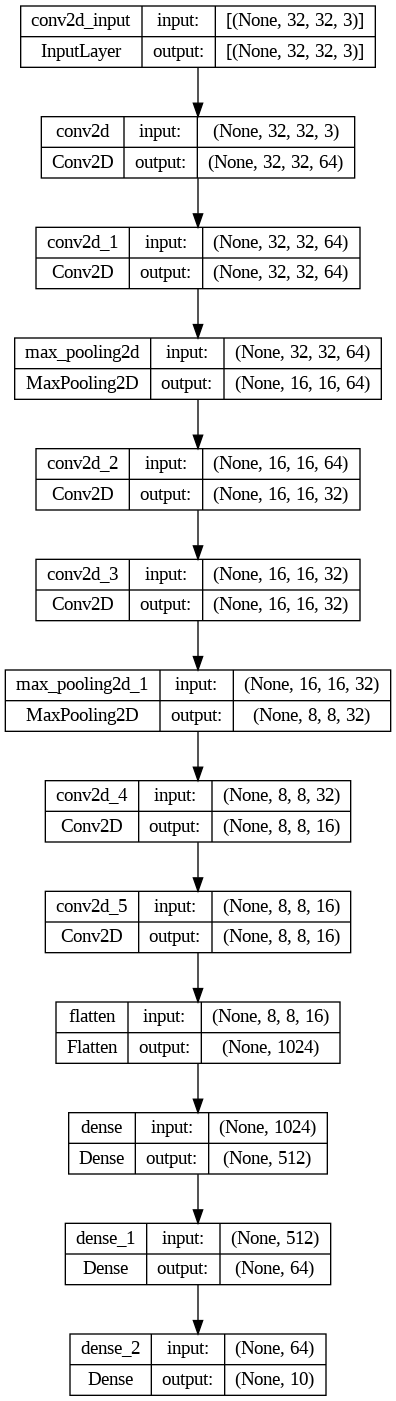

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, 'model_info.png', show_shapes=True)

In [ ]:
# wskazuję optymalizator Stochastic Gradient Descent
# "momentum" pomaga przyspieszyć/wzmocnić  gradienty we właściwym kierunku

optim = SGD(learning_rate=0.001, momentum=0.5)

In [ ]:
model.compile(optimizer=optim, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(
   x_train,
   to_categorical(y_train),
   epochs=80,
   validation_split=0.15,
   verbose=1
)

Epoch 1/80
1329/1329 [==============================] - 21s 9ms/step - loss: 2.2992 - accuracy: 0.1423 - val_loss: 2.2918 - val_accuracy: 0.1760
Epoch 2/80
1329/1329 [==============================] - 10s 7ms/step - loss: 2.2223 - accuracy: 0.1910 - val_loss: 2.0631 - val_accuracy: 0.2324
Epoch 3/80
1329/1329 [==============================] - 12s 9ms/step - loss: 1.9599 - accuracy: 0.2773 - val_loss: 1.8880 - val_accuracy: 0.3125
Epoch 4/80
1329/1329 [==============================] - 11s 8ms/step - loss: 1.8002 - accuracy: 0.3402 - val_loss: 1.8125 - val_accuracy: 0.3453
Epoch 5/80
1329/1329 [==============================] - 11s 8ms/step - loss: 1.6990 - accuracy: 0.3802 - val_loss: 1.6666 - val_accuracy: 0.3827
Epoch 6/80
1329/1329 [==============================] - 11s 8ms/step - loss: 1.6198 - accuracy: 0.4050 - val_loss: 1.6954 - val_accuracy: 0.3791
Epoch 7/80
1329/1329 [==============================] - 9s 7ms/step - loss: 1.5585 - accuracy: 0.4291 - val_loss: 1.7358 - val_acc

In [ ]:
eval = model.evaluate(x_test, to_categorical(y_test))
eval

313/313 [==============================] - 1s 4ms/step - loss: 1.3933 - accuracy: 0.7008


[1.393257975578308, 0.7008000016212463]

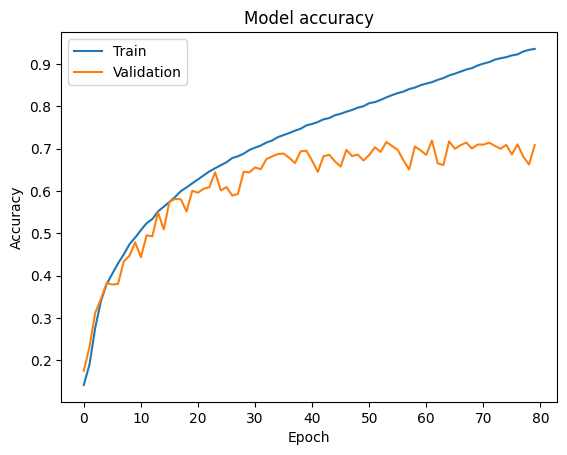

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:


import tensorflow as tf

# predykcja na danych testowych

y_pred = model.predict(x_test)



313/313 [==============================] - 1s 3ms/step


In [ ]:
y_pred

array([[1.1867454e-07, 2.8336758e-02, 4.4753961e-07, ..., 9.0101389e-07,
        3.0867453e-04, 2.0128122e-01],
       [1.2817451e-03, 8.5240221e-01, 3.8472757e-13, ..., 9.2731676e-15,
        1.4614236e-01, 1.7367110e-04],
       [1.8009987e-02, 2.4329588e-06, 1.4603837e-09, ..., 5.0433494e-11,
        9.8191571e-01, 7.0057118e-05],
       ...,
       [1.4932745e-09, 1.9838534e-15, 9.0849981e-06, ..., 9.8697405e-05,
        3.5178180e-11, 5.3793671e-12],
       [1.4739632e-07, 9.9999988e-01, 2.2216894e-10, ..., 2.0312609e-14,
        3.1017978e-13, 3.1334640e-08],
       [2.3172133e-12, 3.2376380e-15, 7.8653084e-10, ..., 9.9996686e-01,
        2.6453171e-15, 9.3818009e-13]], dtype=float32)

In [ ]:
# konwersja klas predykcyjnych do wektorów "one hot"
y_pred_classes = np.argmax(y_pred,axis = 1)
y_pred_classes


array([3, 1, 8, ..., 5, 1, 7])

In [ ]:
# obliczenie matrycji konfuzji
confusion_mtx = tf.math.confusion_matrix(y_test, y_pred_classes)

[[Text(0.5, 0, 'samolot'),
  Text(1.5, 0, 'samochód'),
  Text(2.5, 0, 'ptak'),
  Text(3.5, 0, 'kot'),
  Text(4.5, 0, 'jeleń'),
  Text(5.5, 0, 'pies'),
  Text(6.5, 0, 'frog'),
  Text(7.5, 0, 'koń'),
  Text(8.5, 0, 'statek'),
  Text(9.5, 0, 'ciężarówka')],
 [Text(0, 0.5, 'samolot'),
  Text(0, 1.5, 'samochód'),
  Text(0, 2.5, 'ptak'),
  Text(0, 3.5, 'kot'),
  Text(0, 4.5, 'jeleń'),
  Text(0, 5.5, 'pies'),
  Text(0, 6.5, 'frog'),
  Text(0, 7.5, 'koń'),
  Text(0, 8.5, 'statek'),
  Text(0, 9.5, 'ciężarówka')]]

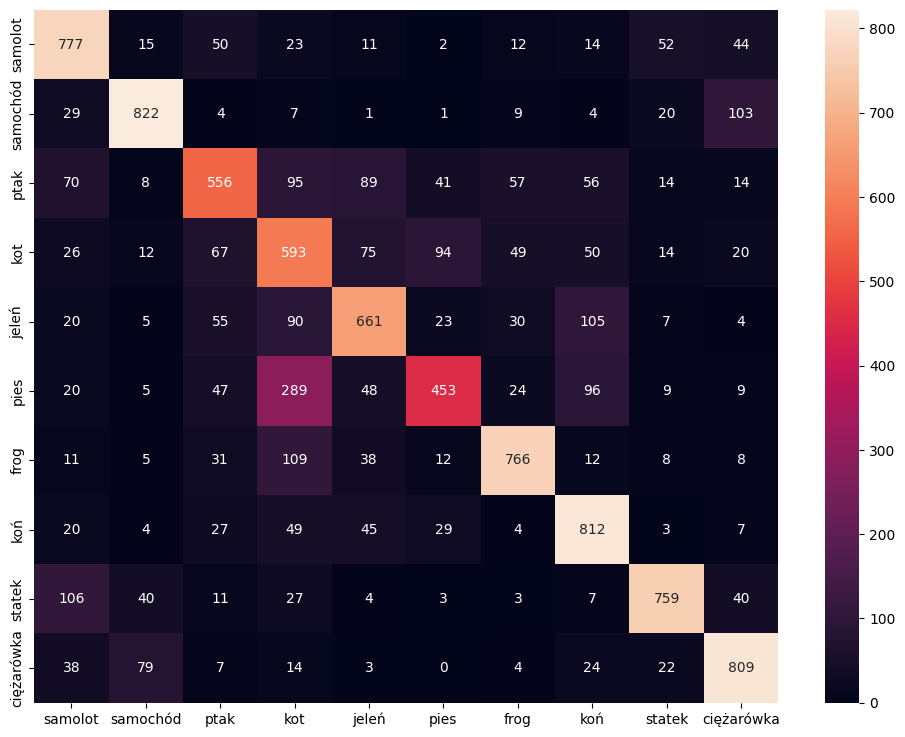

In [ ]:
import seaborn as sns


classes = ['samolot', 'samochód', 'ptak', 'kot', 'jeleń', 'pies', 'frog', 'koń', 'statek', 'ciężarówka']

plt.figure(figsize=(12, 9))
c = sns.heatmap(confusion_mtx, annot=True, fmt='g')
c.set(xticklabels=classes, yticklabels=classes)

**Optymalizacja architektury CNN**

In [ ]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import Convolution2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras import regularizers

Trenowanie głębokich sieci neuronowych z dziesiątkami warstw jest trudne, ponieważ mogą one być wrażliwe na początkowe losowe wagi i konfigurację algorytmu uczenia.

Jednym z możliwych powodów tej trudności jest to, że rozkład danych wejściowych do warstw głęboko w sieci może się zmieniać po każdej mini-partii (batch), gdy wagi są aktualizowane. Może to spowodować, że algorytm uczący się będzie wiecznie gonił za ruchomym celem. Ta zmiana w rozkładzie wejść do warstw w sieci jest określana techniczną nazwą "wewnętrznego przesunięcia kowariancji".

**BatchNormalization** to technika uczenia bardzo głębokich sieci neuronowych, która standaryzuje dane wejściowe do warstwy dla każdej mini-partii. Ma to wpływ na stabilizację procesu uczenia się i radykalne zmniejszenie liczby epok treningowych wymaganych do trenowania głębokich sieci.

In [ ]:
# BatchNormalization():
# warstwa, która normalizuje swoje dane wejściowe.
# Normalizacja wsadowa stosuje transformację, która utrzymuje średnią wartość wyjściową blisko 0, a odchylenie standardowe wyjścia blisko 1.
# Co ważne, normalizacja wsadowa działa inaczej podczas uczenia i wnioskowania.

model = Sequential([
    Convolution2D(filters=128, kernel_size=(5,5), input_shape=(32,32,3), activation='relu', padding='same'),
    BatchNormalization(),

    Convolution2D(filters=128, kernel_size=(5,5), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPool2D((2,2)),

    Convolution2D(filters=64, kernel_size=(5,5), activation='relu', padding='same'),
    BatchNormalization(),

    Convolution2D(filters=64, kernel_size=(5,5), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPool2D((2,2)),

    Convolution2D(filters=32, kernel_size=(5,5), activation='relu', padding='same'),
    BatchNormalization(),

    Convolution2D(filters=32, kernel_size=(5,5), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPool2D((2,2)),

    Convolution2D(filters=16, kernel_size=(3,3), activation='relu', padding='same'),
    BatchNormalization(),

    Convolution2D(filters=16, kernel_size=(3,3), activation='relu', padding='same'),
    BatchNormalization(),

    Flatten(),

    Dense(units=32, activation="relu"),
    Dropout(0.15),
    Dense(units=16, activation="relu"),
    Dropout(0.05),
    Dense(units=10, activation="softmax")
])



In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 128)       9728      
                                                                 
 batch_normalization (Batch  (None, 32, 32, 128)       512       
 Normalization)                                                  
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 128)       409728    
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 128)       512       
 chNormalization)                                                
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 128)       0         
 g2D)                                                            
                                                      

In [ ]:
# root mean square propagation
# rozszerzenie algorytmu Stochastic Gradient Descent (SGD), gdzie  jest wykorzystywany gradient
# z  dostosowywaniem rozmiaru kroku indywidualnie dla każdej wagi.
optim = RMSprop(learning_rate=0.001)

In [ ]:
model.compile(optimizer=optim, loss='categorical_crossentropy', metrics=['accuracy'])

**Po uaktywnieniu procesora GPU**

In [ ]:
history = model.fit(
   x_train,
   to_categorical(y_train),
   epochs=80,
   validation_split=0.15,
   verbose=1
)

Epoch 1/80
1329/1329 [==============================] - 32s 20ms/step - loss: 1.6949 - accuracy: 0.3753 - val_loss: 1.3903 - val_accuracy: 0.5044
Epoch 2/80
1329/1329 [==============================] - 29s 22ms/step - loss: 1.2169 - accuracy: 0.5700 - val_loss: 1.1509 - val_accuracy: 0.6048
Epoch 3/80
1329/1329 [==============================] - 24s 18ms/step - loss: 0.9780 - accuracy: 0.6667 - val_loss: 0.9031 - val_accuracy: 0.6939
Epoch 4/80
1329/1329 [==============================] - 26s 19ms/step - loss: 0.8371 - accuracy: 0.7189 - val_loss: 0.7725 - val_accuracy: 0.7340
Epoch 5/80
1329/1329 [==============================] - 25s 19ms/step - loss: 0.7284 - accuracy: 0.7618 - val_loss: 0.8469 - val_accuracy: 0.7211
Epoch 6/80
1329/1329 [==============================] - 24s 18ms/step - loss: 0.6526 - accuracy: 0.7841 - val_loss: 0.7672 - val_accuracy: 0.7564
Epoch 7/80
1329/1329 [==============================] - 25s 19ms/step - loss: 0.5859 - accuracy: 0.8093 - val_loss: 0.7916 -

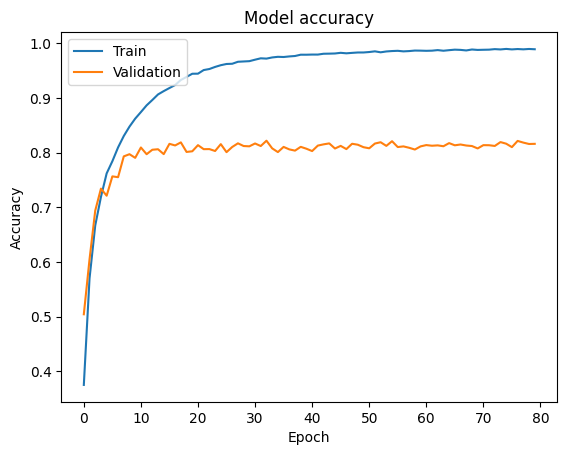

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
eval_opt_cnn = model.evaluate(x_test, to_categorical(y_test))
eval_opt_cnn

313/313 [==============================] - 2s 7ms/step - loss: 1.8293 - accuracy: 0.8084


[1.8293243646621704, 0.8083999752998352]

In [ ]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred,axis = 1)
confusion_mtx_opt_cnn = tf.math.confusion_matrix(y_test, y_pred_classes)

313/313 [==============================] - 2s 5ms/step


[[Text(0.5, 0, 'samolot'),
  Text(1.5, 0, 'samochód'),
  Text(2.5, 0, 'ptak'),
  Text(3.5, 0, 'kot'),
  Text(4.5, 0, 'jeleń'),
  Text(5.5, 0, 'pies'),
  Text(6.5, 0, 'frog'),
  Text(7.5, 0, 'koń'),
  Text(8.5, 0, 'statek'),
  Text(9.5, 0, 'ciężarówka')],
 [Text(0, 0.5, 'samolot'),
  Text(0, 1.5, 'samochód'),
  Text(0, 2.5, 'ptak'),
  Text(0, 3.5, 'kot'),
  Text(0, 4.5, 'jeleń'),
  Text(0, 5.5, 'pies'),
  Text(0, 6.5, 'frog'),
  Text(0, 7.5, 'koń'),
  Text(0, 8.5, 'statek'),
  Text(0, 9.5, 'ciężarówka')]]

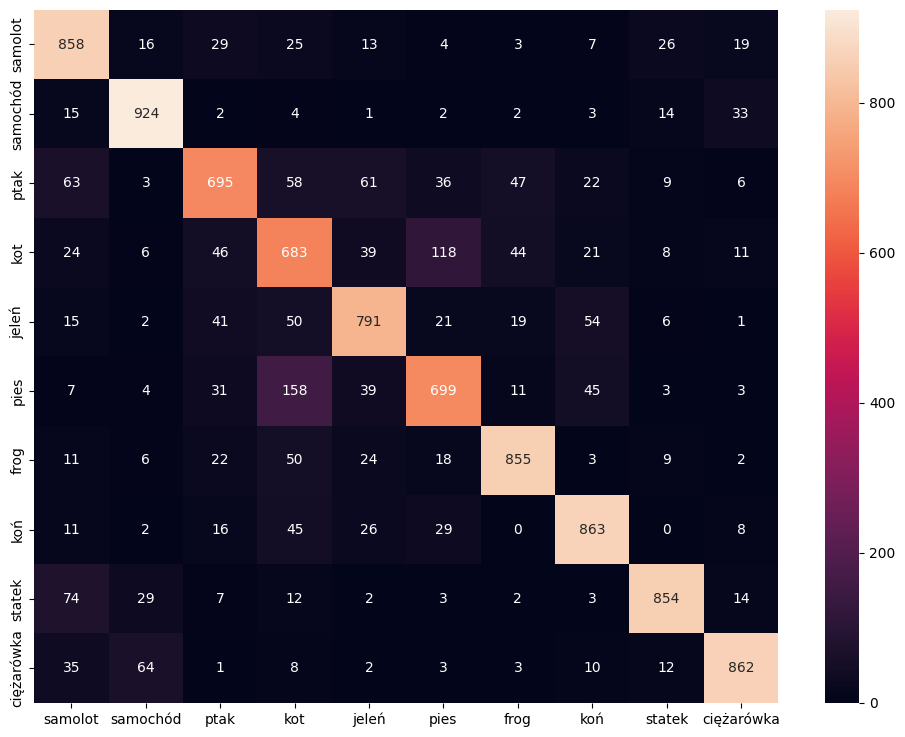

In [ ]:
plt.figure(figsize=(12, 9))
c = sns.heatmap(confusion_mtx_opt_cnn, annot=True, fmt='g')
c.set(xticklabels=classes, yticklabels=classes)

**Augmentation**

In [ ]:
model = Sequential([
   Convolution2D(filters=128, kernel_size=(5,5), input_shape=(32,32,3), activation='relu', padding='same'),
   BatchNormalization(),
   Convolution2D(filters=128, kernel_size=(5,5), activation='relu', padding='same'),
   BatchNormalization(),
   MaxPool2D((2,2)),
   Convolution2D(filters=64, kernel_size=(5,5), activation='relu', padding='same'),
   BatchNormalization(),
   Convolution2D(filters=64, kernel_size=(5,5), activation='relu', padding='same'),
   BatchNormalization(),
   MaxPool2D((2,2)),
   Convolution2D(filters=32, kernel_size=(5,5), activation='relu', padding='same'),
   BatchNormalization(),
   Convolution2D(filters=32, kernel_size=(5,5), activation='relu', padding='same'),
   BatchNormalization(),
   MaxPool2D((2,2)),
   Convolution2D(filters=16, kernel_size=(3,3), activation='relu', padding='same'),
   BatchNormalization(),
   Convolution2D(filters=16, kernel_size=(3,3), activation='relu', padding='same'),
   BatchNormalization(),
   Flatten(),
   Dense(units=32, activation="relu"),
   Dropout(0.15),
   Dense(units=16, activation="relu"),
   Dropout(0.05),
   Dense(units=10, activation="softmax")
])


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 32, 32, 128)       9728      
                                                                 
 batch_normalization_8 (Bat  (None, 32, 32, 128)       512       
 chNormalization)                                                
                                                                 
 conv2d_15 (Conv2D)          (None, 32, 32, 128)       409728    
                                                                 
 batch_normalization_9 (Bat  (None, 32, 32, 128)       512       
 chNormalization)                                                
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 16, 16, 128)       0         
 g2D)                                                            
                                                      

In [ ]:
optim = RMSprop(learning_rate=0.001)
model.compile(optimizer=optim, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=10,
    horizontal_flip=True,   # odwrócenie poziome
    vertical_flip = False,  # odwrócenie pionie
    width_shift_range=0.1,  # przesunięcie wzdłuż osi x
    height_shift_range=0.1, # przesunięcie wzdłuż osi y
    rescale = 1. / 255,
    shear_range=0.05,       # przycinanie obrazu
    zoom_range=0.05,
)


In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

batch_size = 64
train_generator = datagen.flow(x_train, y_train, batch_size=batch_size)

In [ ]:
datagen_valid = ImageDataGenerator(
   rescale = 1. / 255,
)



In [ ]:
x_valid = x_train[:100*batch_size]
y_valid = y_train[:100*batch_size]

x_valid.shape[0]

6400

In [ ]:
valid_steps = x_valid.shape[0] // batch_size
validation_generator = datagen_valid.flow(x_valid, y_valid, batch_size=batch_size)

In [ ]:
history = model.fit(
   train_generator,
   steps_per_epoch=len(x_train) // batch_size,
   epochs=80,
   validation_data=validation_generator,
   validation_freq=1,
   validation_steps=valid_steps,
   verbose=2
)

Epoch 1/80
781/781 - 48s - loss: 1.8278 - accuracy: 0.3381 - val_loss: 1.3982 - val_accuracy: 0.4822 - 48s/epoch - 62ms/step
Epoch 2/80
781/781 - 44s - loss: 1.3224 - accuracy: 0.5297 - val_loss: 1.1930 - val_accuracy: 0.5808 - 44s/epoch - 57ms/step
Epoch 3/80
781/781 - 43s - loss: 1.1001 - accuracy: 0.6202 - val_loss: 1.1337 - val_accuracy: 0.6136 - 43s/epoch - 55ms/step
Epoch 4/80
781/781 - 44s - loss: 0.9622 - accuracy: 0.6718 - val_loss: 0.8449 - val_accuracy: 0.7084 - 44s/epoch - 56ms/step
Epoch 5/80
781/781 - 44s - loss: 0.8711 - accuracy: 0.7090 - val_loss: 0.8241 - val_accuracy: 0.7294 - 44s/epoch - 56ms/step
Epoch 6/80
781/781 - 43s - loss: 0.8016 - accuracy: 0.7365 - val_loss: 0.6601 - val_accuracy: 0.7728 - 43s/epoch - 55ms/step
Epoch 7/80
781/781 - 43s - loss: 0.7474 - accuracy: 0.7519 - val_loss: 0.7724 - val_accuracy: 0.7480 - 43s/epoch - 55ms/step
Epoch 8/80
781/781 - 43s - loss: 0.7037 - accuracy: 0.7708 - val_loss: 0.6115 - val_accuracy: 0.7942 - 43s/epoch - 56ms/step


In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


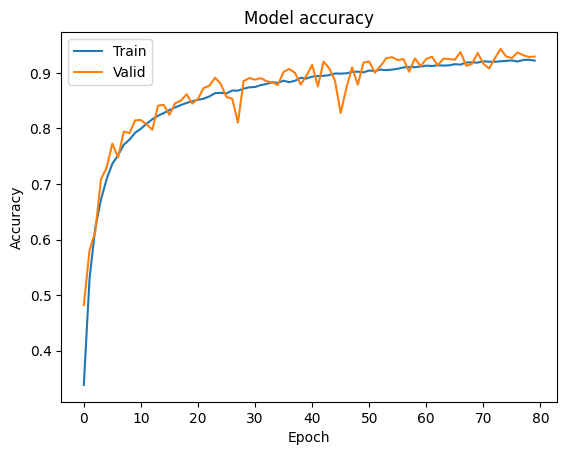

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

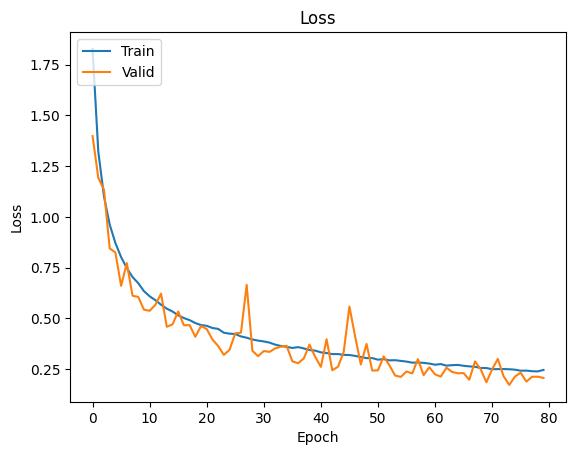

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

In [ ]:
x_final_test = x_test / 255.0
eval = model.evaluate(x_final_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.5182 - accuracy: 0.8611


In [ ]:
# Porównanie kńcowe metryki Accuracy
print("Model inicjalny               :", eval)
print("Model z  zoptymalizowanym CNN :", eval_opt_cnn)
print("Model finałowy                :", eval_final)

Model inicjalny               : [1.393257975578308, 0.7008000016212463]
Model z  zoptymalizowanym CNN : [1.8293243646621704, 0.8083999752998352]
Model finałowy                : [0.5182356238365173, 0.8611000180244446]
